<center><h2>Technical Task (Module 3) - <b>Data Analytics 1.0</b></center>

# Objectives
> In this task, we would like you to do exploratory data analysis (EDA) using. Data processing and
visualization should be done using Python
# Instructions
![dataset](images/load_diabetes.jpg)
> Using Sklearn Diabetes data, create an EDA that answers the defined objective :
><b>What are the factors that contribute to the disease progression of a diabetes patient?</b>

<b>Note on the assignment</b> :
- Provide 5 questions and or assumptions
- Use some data visualization
- Provide conclusion and or recommendation based on the analysis
- Please provide link to your Google Colab notebook OR attach the .ipynb files if you are using Jupyter notebook

<h3>Load Dataset

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.datasets import load_diabetes
data_dia = load_diabetes()

<h3>The Properties of The Data

In [2]:
print(data_dia.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

[The jurnal](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf), said that ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Disease progression describes the natural history of disease, such as pain, or biomarker of drug response, such as blood pressure. The action of a drug, such as inhibiting an enzyme or activating a receptor, leads to a change in disease status over time (https://www.ncbi.nlm.nih.gov). Progressive disease is a term that describes a disease that is progressing or worsening (https://www.verywellhealth.com).

<h3>Display Top 5 Rows of The Dataframe

In [3]:
data = pd.DataFrame(data=data_dia.data, columns=data_dia.feature_names)
data['disease_pro'] = data_dia.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_pro
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<h3>Rename the columns in order to easly understand more

In [4]:
data.rename(columns={"s1":"tc","s2":"ldl","s3":"hdl","s4":"tch","s5":"ltg","s6":"glu"}, inplace=True)
data.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_pro
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
print("data shape:", data.shape)
data.describe()

data shape: (442, 11)


,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_pro
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


<h3>Quality of Data: Missing Values and Outliers

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   tc           442 non-null    float64
 5   ldl          442 non-null    float64
 6   hdl          442 non-null    float64
 7   tch          442 non-null    float64
 8   ltg          442 non-null    float64
 9   glu          442 non-null    float64
 10  disease_pro  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


The dataset has been <b>scaled</b> and there is <b>no missing</b> values

<AxesSubplot:>

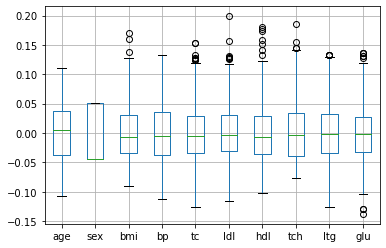

In [7]:
data.loc[:, data.columns != "disease_pro"].boxplot()

There are outliers in each baseline <b>except</b> age and gender

<AxesSubplot:>

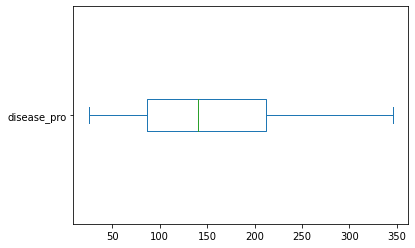

In [8]:
# I separate disease column. Because it has different scale with others
data["disease_pro"].plot.box(vert=False)

<h3>Handle Outliers

In [9]:
data_newr = data.copy() 

# Looping for determining Q1, Q3, IQR and Removing outliers
for column in data_newr.columns:
    Q1 = data_newr[column].quantile(0.25)
    Q3 = data_newr[column].quantile(0.75)
    IQR = Q3 - Q1
    data_newr = data_newr[~((data_newr[column] < (Q1 - 1.5*IQR)) | (data_newr[column] > (Q3 + 1.5*IQR)))]
    
# Check ukuran (baris dan kolom) sebelum dan setelah data yang outliers dibuang
print('Old Shape: ', data.shape)
print('New Shape: ', data_newr.shape)
print('Number of Outliers: ', data.shape[0] - data_newr.shape[0])
print('Percentage of Removed Data:', "{:.2%}".format((data.shape[0] - data_newr.shape[0])/data.shape[0]))

Old Shape:  (442, 11)
New Shape:  (405, 11)
Number of Outliers:  37
Percentage of Removed Data: 8.37%


<h3># Correlation of Target with Features

According to [User's guide to correlation coefficients](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/), level of correlation for medicine world can be classed the following:

![Correlation_Cofficients](images/CorrelationCoefficients.jpg)

<AxesSubplot:>

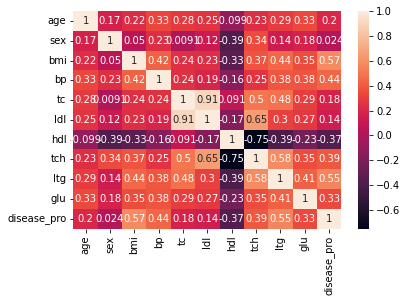

In [10]:
sns.heatmap(data_newr.corr(), annot=True)

<h3># Sequence of Factors Contributing to Disease Progression

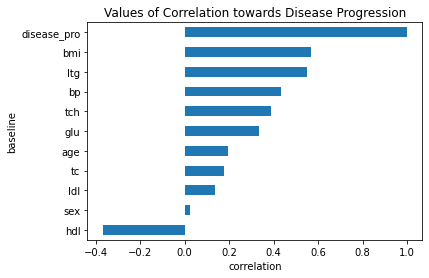

In [11]:
import matplotlib.pyplot as plt
corre = pd.DataFrame(data_newr.corr())
corre_dp = corre["disease_pro"].sort_values()
corre_dp.plot(kind="barh")
plt.ylabel("baseline")
plt.xlabel("correlation")
plt.title("Values of Correlation towards Disease Progression")
plt.show()

<h4>> Level of Correlation

In [12]:
for ind in corre.index:
    if ((corre.loc[ind,"disease_pro"] > 0.95) | (corre.loc[ind,"disease_pro"] < -0.95)):
        corre.loc[ind,"level"] = "Perfect"
    elif ((corre.loc[ind,"disease_pro"] > 0.75) | (corre.loc[ind,"disease_pro"] < -0.75)):
        corre.loc[ind,"level"] = "Very Strong"
    elif ((corre.loc[ind,"disease_pro"] > 0.55) | (corre.loc[ind,"disease_pro"] < -0.55)):
        corre.loc[ind,"level"] = "Moderate"
    elif ((corre.loc[ind,"disease_pro"] > 0.25) | (corre.loc[ind,"disease_pro"] < -0.25)):
        corre.loc[ind,"level"] = "Fair"
    elif ((corre.loc[ind,"disease_pro"] > 0.05) | (corre.loc[ind,"disease_pro"] < -0.05)):
        corre.loc[ind,"level"] = "Poor"
    else:
        corre.loc[ind,"level"] = "None"

from the above, we can know that correlation between Disease Progression and each variable baseline is relatively higher than 0.25. Age, sex, total serum cholesterol, and low-density lipoproteins are exception. And high_density lipoproteins negatively correlate with disease progression (> 0.35). And <b>the factors that contribute the most (moderate) is body mass index (BMI) and possibly log of serum triglycerides level (LTG)</b>, both value is higher that 0.55. The list of level of contribution is the following:

In [13]:
corre[["disease_pro","level"]].sort_values(by="disease_pro", ascending=False)

,disease_pro,level
disease_pro,1.000000,Perfect
bmi,0.569476,Moderate
ltg,0.551414,Moderate
bp,0.435305,Fair
tch,0.387616,Fair
glu,0.334036,Fair
age,0.196244,Poor
tc,0.179599,Poor
ldl,0.138814,Poor
sex,0.024371,None


<h3>1# What is the distribution of the Disease Progression looks like?

In [14]:
data_newr['disease_pro'].describe()

count    405.000000
mean     148.590123
std       75.182681
min       25.000000
25%       85.000000
50%      138.000000
75%      200.000000
max      341.000000
Name: disease_pro, dtype: float64

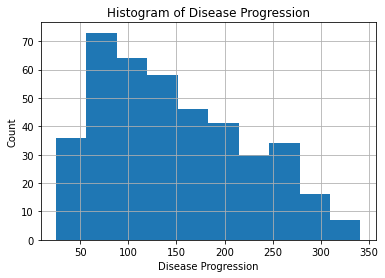

In [15]:
data_newr['disease_pro'].hist()
plt.ylabel("Count")
plt.xlabel("Disease Progression")
plt.title("Histogram of Disease Progression")
plt.show()

The disease progression is ranged from 25 to 341. The distribution is right skewed which indicates more disease progression have a value below the overall average (148.6)

<h3>2# Does BMI make diabetes disease worse?</h3>

> according to correlation analysis, body mass index (BMI) correlation value is the highest (0.57, moderate) for disease progression. Let's see the scatter plot

<AxesSubplot:xlabel='bmi', ylabel='disease_pro'>

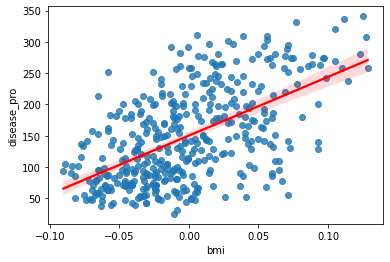

In [16]:
sns.regplot(data=data_newr[["bmi","disease_pro"]],
            x="bmi", y="disease_pro",
            line_kws={"color": "red"})

<h3>3# The Older a Person, The Higher Blood Sugar Level?</h3>

>As we know, commonly people get diabetes and reliaze it when they are already old. let's prove it by data!

In [17]:
data_newr[["age","glu"]].corr()

,age,glu
age,1.000000,0.331606
glu,0.331606,1.000000


<AxesSubplot:xlabel='age', ylabel='glu'>

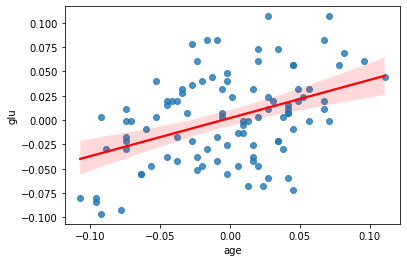

In [18]:
sns.regplot(data=data_newr.sample(100, random_state=1), 
            x="age", y="glu",
            line_kws={"color": "red"})

Yap, <b>fairly</b> the older a person, the higher blood sugar level

<h3>4# The Older a Person, The more progressive disease?</h3>

>Initianally I hypnotize that the older a person, the easier her/his disease worse. let's prove it by data!

In [19]:
data_newr[["age","disease_pro"]].corr()

,age,disease_pro
age,1.000000,0.196244
disease_pro,0.196244,1.000000


<AxesSubplot:xlabel='age', ylabel='disease_pro'>

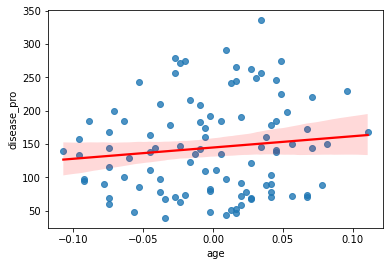

In [20]:
sns.regplot(data=data_newr.sample(100, random_state=1), 
            x="age", y="disease_pro",
            line_kws={"color": "red"})

And I was wrong. The age is <b>poorly</b> correlated with disease progression

<h3>5# Is the higher BMI the higher the risk of cholesterol?</h3>

> most people think that Cholesterol is synonymous with fat, let's prove it by correlation!

In [21]:
data_newr[["bmi","tch"]].corr()

,bmi,tch
bmi,1.000000,0.374421
tch,0.374421,1.000000


<AxesSubplot:xlabel='bmi', ylabel='tch'>

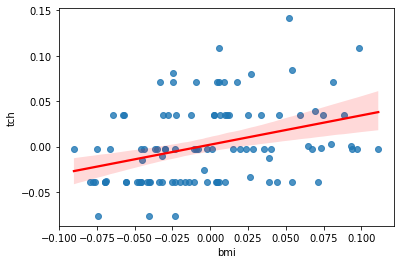

In [22]:
sns.regplot(data=data_newr.sample(105, random_state=1),
            x="bmi", y="tch",
            line_kws={"color":"red"})

Yap, <b>fairly</b> the higher BMI the higher the risk of cholesterol

<h3> Summary </h3>

- The data was derived from [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) which consists of ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
- The dataset has been scaled and there is no missing values
- With IQR approach, there are 37 outliers across dataset or about 8.37%. After removing outlier data, n = 405
---
- High_density lipoproteins **negatively** and **pairly** correlate with disease progression (> 0.35).
- The factors that contribute the most (**moderate**) is body mass index and possibly log of serum triglycerides level (>0.55)
- The disease progression is ranged from 25 to 341. The distribution is right skewed which indicates more disease progression have a value below the overall average (148.6)
- Body mass index (BMI) correlate the most (0.57, moderate) for disease progression.
- **fairly** the older a person, the higher blood sugar level
- One might think that the older a person, the easier her/his disease worse. But we **can’t proof a strong linear relationship** (correlation is poor, <0.2)
- Body mass index pairly correlate to the risk of cholesterol like most people think that Cholesterol is synonymous with fat